# **Estudo Dirigido 3 - Edges**

**Aluno:** André Paiva Conrado Rodrigues

**Matéria:** ENGG64 - Visão Computacional - 2023.2

## 1 - Importação de dependências e configurações

Para esta atividade é utilizada a `machinevisiontoolbox` do Peter Corke e a biblioteca `matplotlib` para exibição de imagens.

In [ ]:
from machinevisiontoolbox import *
from matplotlib import pyplot as plt

## 2 - Abrindo a imagem

A imagem original é carregada na variável `penguins`, e exibida com `matplotlib`. A importação foi feita com a representação numérica dos pixels em `float`.

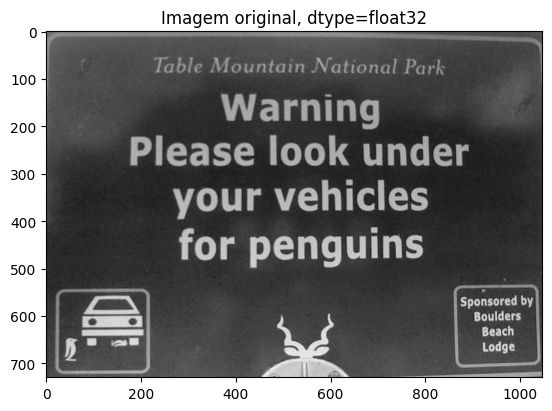

In [2]:
# Leitura da imagem original
penguins = Image.Read('penguins.png', dtype='float')

# Exibição da imagem original
fig, ax = plt.subplots(1, 1)
im = ax.imshow(penguins.image, cmap='gray')
ax.set_title('Imagem original, dtype=' + str(penguins.image.dtype))
plt.show()

## 3 - Sobel horizontal e vertical

Por meio da toolbox são obtidos os kernels Sobel, armazenados nas variáveis `Kv` (vertical) e `Ku` (horizontal).

In [3]:
# Kernel vertical
Kv = Kernel.Sobel()
print(Kv)


[[ 0.125  0.    -0.125]
 [ 0.25   0.    -0.25 ]
 [ 0.125  0.    -0.125]]


In [4]:
# Kernel horizontal
Ku = Kv.T
print(Ku)

[[ 0.125  0.25   0.125]
 [ 0.     0.     0.   ]
 [-0.125 -0.25  -0.125]]


Os kernels `Kv` e `Ku` são aplicados separadamente à imagem, gerando duas imagens diferentes (`Iv` e `Iu`) com destaque de contornos na vertical e na horizontal, respectivamente.

Foram plotadas as imagens `Iv` e `Iu`, bem como suas distribuições. Após a aplicação do Sobel, vemos que os pixels podem assumir valores positivos e negativos, o que justifica a escolha de utilização da representação numérica em `float`, ao invés de `uint8`.

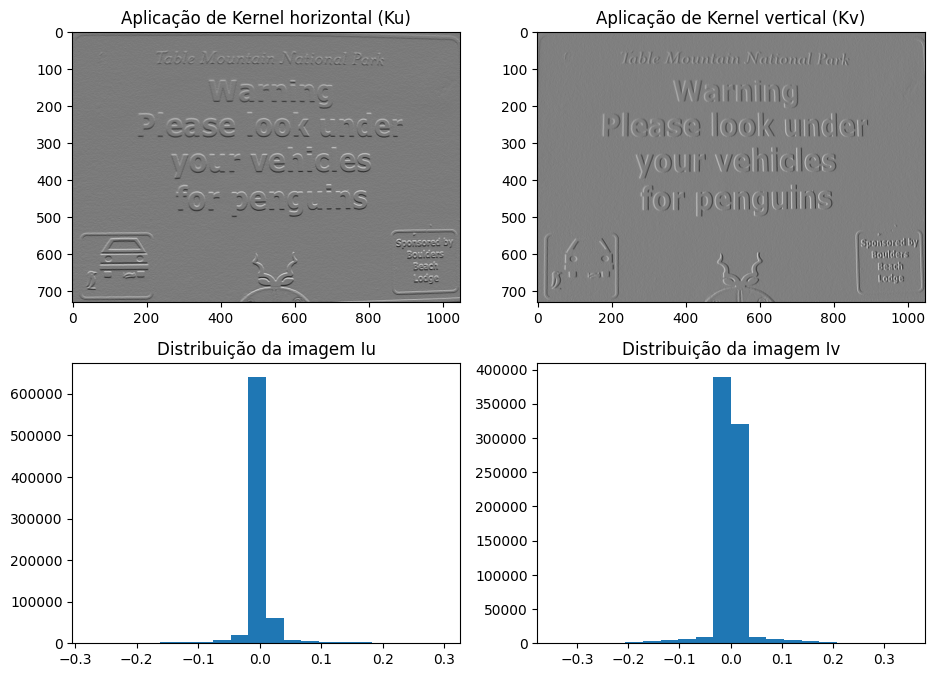

In [5]:
# Convolução com Kv e Ku
Iv = penguins.convolve(Kv)
Iu = penguins.convolve(Ku)

# Plot
fig, ax = plt.subplots(2, 2, figsize=(11, 8))
iu_im = ax[0][0].imshow(Iu.image, cmap='gray')
ax[0][0].set_title('Aplicação de Kernel horizontal (Ku)')
iv_im = ax[0][1].imshow(Iv.image, cmap='gray')
ax[0][1].set_title('Aplicação de Kernel vertical (Kv)')
iu_hist = ax[1][0].hist(Iu.image.flatten(), bins=20)
ax[1][0].set_title('Distribuição da imagem Iu')
iv_hist = ax[1][1].hist(Iv.image.flatten(), bins=20)
ax[1][1].set_title('Distribuição da imagem Iv')
plt.show()

## 4 - Combinação de `Iu` e `Iv` 

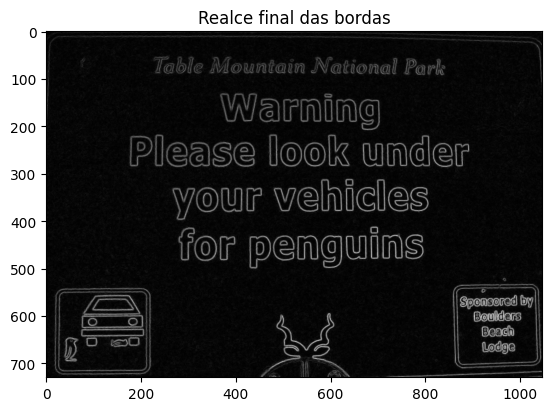

In [6]:
# Combinação de Iu e Iv
I = np.sqrt(Iu.image ** 2 + Iv.image ** 2)

# Plot
fig, ax = plt.subplots(1, 1)
im = ax.imshow(I, cmap='gray')
ax.set_title('Realce final das bordas')
plt.show()